#  Project Title: CIFAR10 Image Classification
## 1. Business Understanding
#### Goal:
- Train and compare CNN models on CIFAR10 (colored) dataset ot classify multi-category images

## Step 1: Data Understanding


#### Step I: Imports and setup

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#### Step II: Load and Preprocess datasets

CIFAR10 Shape: (50000, 32, 32, 3)


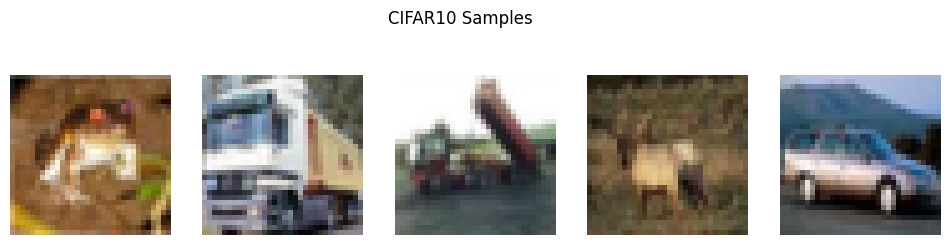

In [6]:
# Load datasets
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Basic info
print(f"CIFAR10 Shape: {x_train.shape}")

# Visual check
fig, axs = plt.subplots(1,5, figsize=(12,3))
for i in range(5):
    axs[i].imshow(x_train[i])
    axs[i].axis('off')
plt.suptitle('CIFAR10 Samples')
plt.show()

## Step 2: Data Preparation

In [10]:
# Normalize and add data augmentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize 
x_train,x_test = x_train/255.0, x_test/255.0

# Augmentation for cifar10 for more complexity
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=.1,
    height_shift_range=.1,
    horizontal_flip=True
)

# Prepare the data generators
train_cifar = datagen.flow(x_train, y_train, batch_size=64)

##  Step 3: Modeling(CRISP-DM ++ FunctionalAPI style)

### Step I: Define Model Function

In [17]:
def build_cnn(input_shape,num_classes=10):
    inputs = tf.keras.Input(shape=input_shape)

    # Layer 1
    x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    # Layer 2
    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    # Layer 3
    x = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(.4)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    return tf.keras.Model(inputs, outputs, name='cnn_base_model')

model = build_cnn((32,32,3))

#### Step II: Compile model

In [22]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "cnn_base_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,434 (372.79 KB)

 Trainable params: 94,986 (371.04 KB)

 Non-trainable params: 448 (1.75 KB)

## Step 4: Evaluation

#### Step I: Fit the Model

In [ ]:
history = model.fit(x_train, y_train,epochs=10, validation_split=.1, verbose=2,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 - 87s - 56ms/step - accuracy: 0.4614 - loss: 1.5039 - val_accuracy: 0.1000 - val_loss: 17.3063
Epoch 2/10


#### Step II: Visualize

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.title('Training Accuracy and Validation Accuracy Comparsion')
plt.legend()
plt.show()